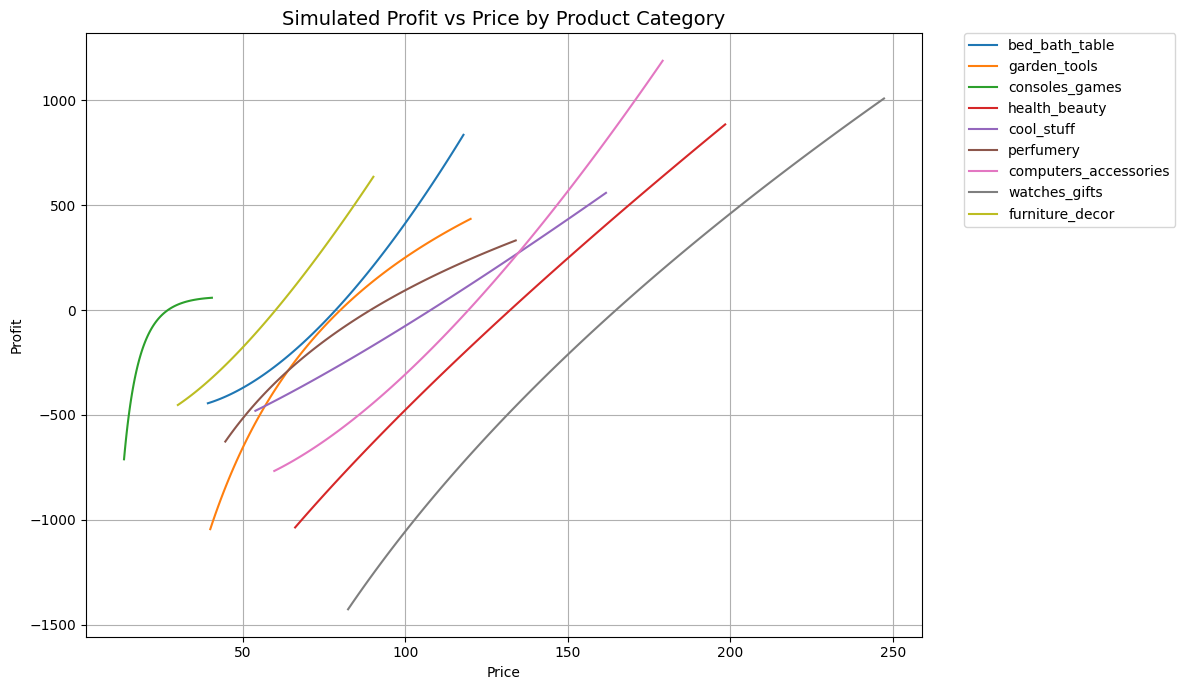

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Load data
df = pd.read_csv('/content/retail_price.csv')

# Clean and prepare
df = df.dropna(subset=['unit_price', 'qty'])
df['log_price'] = np.log(df['unit_price'])
df['log_qty'] = np.log(df['qty'])

# Setup plot
fig, ax = plt.subplots(figsize=(12, 7))

# Unique categories
categories = df['product_category_name'].unique()

for category in categories:
    cat_df = df[df['product_category_name'] == category]

    if cat_df.shape[0] < 5:
        continue  # Skip small groups

    # Estimate elasticity
    X = sm.add_constant(cat_df['log_price'])
    model = sm.OLS(cat_df['log_qty'], X).fit()
    elasticity = model.params['log_price']
    base_price = cat_df['unit_price'].mean()
    base_cost = cat_df['unit_price'].mean()
    base_qty = cat_df['qty'].mean()

    # Simulate prices
    price_range = np.linspace(0.5 * base_price, 1.5 * base_price, 100)
    demand = base_qty * (price_range / base_price) ** elasticity
    profit = (price_range - base_cost) * demand

    # Plot
    ax.plot(price_range, profit, label=category)

# Decorations
ax.set_title('Simulated Profit vs Price by Product Category', fontsize=14)
ax.set_xlabel('Price')
ax.set_ylabel('Profit')
ax.legend(loc='best', bbox_to_anchor=(1.05, 1), borderaxespad=0)
plt.tight_layout()
plt.grid(True)
plt.show()